In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from radar import radar2, norm_df, radar
import pandas as pd

In [2]:
data = pd.read_hdf('combined_maf_dataframe.hdf')

In [3]:
data.columns

Index(['runName', 'version', 'parallax_best18k', 'properMotion_best18k',
       'fO_fONv MedianNvis', 'fO_fOArea', 'median_coadd_u', 'median_coadd_g',
       'median_coadd_r', 'median_coadd_i', 'median_coadd_z', 'median_coadd_y',
       'SNNSNMetric_nSN_Total detected',
       '1 to 10 day Microlensing_Fraction detected of total (mean)',
       '100 to 1000 day Microlensing_Fraction detected of total (mean)',
       'KNePopMetric__multi_color_detect_Fraction detected of total (mean)',
       'GalaxyCountsMetric_extended_N Galaxies (all)',
       'TDEsPopMetric__some_color_Fraction detected of total (mean)',
       'TDEsPopMetric__some_color_pu_Fraction detected of total (mean)',
       'WeakLensingNvisits_Median',
       'Nstars_no_crowding_Total N Stars, no crowding',
       'ExgalM5_with_cuts_3x2ptFoM', 'DD:ELAISS1,u', 'DD:XMM-LSS,u',
       'DD:ECDFS,u', 'DD:COSMOS,u', 'DD:EDFSa,u', 'DD:EDFSb,u', 'DD:ELAISS1,g',
       'DD:XMM-LSS,g', 'DD:ECDFS,g', 'DD:COSMOS,g', 'DD:EDFSa,g', 'DD:E

In [4]:
cols = ['runName', 'parallax_best18k', 'properMotion_best18k', 'fO_fONv MedianNvis',
        'SNNSNMetric_nSN_Total detected',
        'TDEsPopMetric__some_color_pu_Fraction detected of total (mean)',
        'WeakLensingNvisits_Median',
        'ExgalM5_with_cuts_3x2ptFoM',
        '1 to 10 day Microlensing_Fraction detected of total (mean)', 'GalaxyCountsMetric_extended_N Galaxies (all)',
        'Nstars_no_crowding_Total N Stars, no crowding',
        'NEO bright', 'NEO faint', 'TNO']

linear_cols = []

mag_cols = ['runName', 'median_coadd_u', 'median_coadd_g',
           'median_coadd_r', 'median_coadd_i',
            'median_coadd_z', 'median_coadd_y']


name_mapper = {'runName': 'runName', 'parallax_best18k': 'Parallax', 'properMotion_best18k': 'Proper Motion',
       'fO_fONv MedianNvis': 'fO N', 'SNNSNMetric_nSN_Total detected': 'SNeIa',
               '1 to 10 day Microlensing_Fraction detected of total (mean)': 'Fast Micro L',
       'Slow Microlensing_Mean': 'Slow Micro L',
        'TDEsPopMetric__some_color_Fraction detected of total (mean)': 'TDE',
               'TDEsPopMetric__some_color_pu_Fraction detected of total (mean)':'TDE',
               'WeakLensingNvisits_Median': 'WL',
               'ExgalM5_with_cuts_3x2ptFoM': '3x2FoM',
       'GalaxyCountsMetric_extended_N Galaxies (all)': 'N Gals',
       'Nstars_no_crowding_Total N Stars, no crowding': 'N Stars',
       '3 pairs in 15 nights detection loss NEO H=16.0': 'NEO, bright',
               '3 pairs in 30 nights detection loss NEO H=22.0':'NEO, faint',
        '3 pairs in 15 nights detection loss TNO H=6.0':' TNO',
              'NEO bright': 'NEO, bright', 'NEO faint': 'NEO, faint',
              'TNO': 'TNO'}

mag_name_mapper = {'runName': 'runName', 'median_coadd_u': 'u', 'median_coadd_g': 'g',
       'median_coadd_r': 'r', 'median_coadd_i': 'i', 'median_coadd_z': 'z', 'median_coadd_y': 'y'}

In [5]:
data['runName']


0        baseline_retrofoot
1                  baseline
2               bluer_indx0
3               bluer_indx1
4                    carina
               ...         
122    vary_nes_nesfrac0.50
123    vary_nes_nesfrac0.55
124    vary_nes_nesfrac0.75
125    vary_nes_nesfrac1.00
126           virgo_cluster
Name: runName, Length: 127, dtype: object

In [6]:
runs =  [name for name in data['runName'].values]
runs

['baseline_retrofoot',
 'baseline',
 'bluer_indx0',
 'bluer_indx1',
 'carina',
 'ddf_frac_ddf_per0.6',
 'ddf_frac_ddf_per1.6',
 'local_gal_bindx0',
 'local_gal_bindx1',
 'local_gal_bindx2',
 'long_gaps_nightsoff0_delayed-1',
 'long_gaps_nightsoff0_delayed1827',
 'long_gaps_nightsoff1_delayed-1',
 'long_gaps_nightsoff1_delayed1827',
 'long_gaps_nightsoff2_delayed-1',
 'long_gaps_nightsoff2_delayed1827',
 'long_gaps_nightsoff3_delayed-1',
 'long_gaps_nightsoff3_delayed1827',
 'long_gaps_nightsoff4_delayed-1',
 'long_gaps_nightsoff4_delayed1827',
 'long_gaps_nightsoff5_delayed-1',
 'long_gaps_nightsoff5_delayed1827',
 'long_gaps_nightsoff6_delayed-1',
 'long_gaps_nightsoff6_delayed1827',
 'long_gaps_nightsoff7_delayed-1',
 'long_gaps_nightsoff7_delayed1827',
 'long_gaps_np_nightsoff0_delayed-1',
 'long_gaps_np_nightsoff0_delayed1827',
 'long_gaps_np_nightsoff0',
 'long_gaps_np_nightsoff1_delayed-1',
 'long_gaps_np_nightsoff1_delayed1827',
 'long_gaps_np_nightsoff2_delayed-1',
 'long_gaps_

In [7]:
data_normed = norm_df(data, runs, cols, mag_cols=linear_cols,
                      invert_cols=['parallax_best18k', 'properMotion_best18k'], norm_run='baseline')
data_normed = data_normed.rename(columns=name_mapper)

/var/folders/05/z_zc9f654c5dlw06t4s_d68w0000gn/T/ipykernel_5498/3137792346.py:2: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


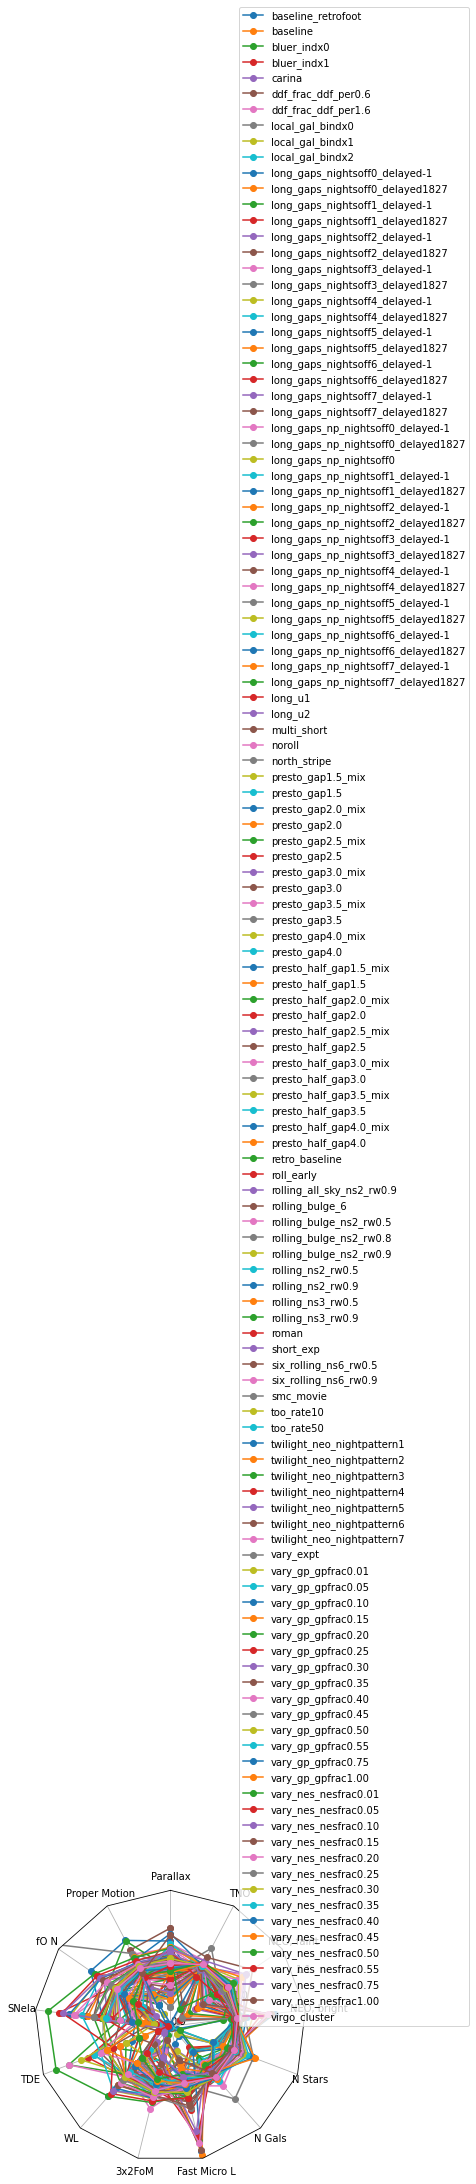

In [8]:
fig, ax = radar(data_normed, legend=True, rgrids=[0.9, 1.0, 1.1])
fig.tight_layout()
#fig.savefig('radar_plots/even_filt_radar.pdf')

In [9]:
data_normed

,runName,Parallax,Proper Motion,fO N,SNeIa,TDE,WL,3x2FoM,Fast Micro L,N Gals,N Stars,"NEO, bright","NEO, faint",TNO
0,baseline_retrofoot,1.025425,1.042678,1.042908,1.000218,0.87,1.037634,0.896675,0.414433,0.963564,0.910600,0.996127,1.000548,0.973765
1,baseline,1.000000,1.000000,1.000000,1.000000,1.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,bluer_indx0,1.006114,1.002333,1.000000,0.998380,0.99,0.951613,0.954816,1.002110,0.978451,0.998683,0.999355,0.987404,0.997531
3,bluer_indx1,0.999880,0.995385,1.000000,0.984302,0.85,0.951613,0.959049,1.005275,0.981113,0.999297,0.998279,0.990690,1.000000
4,carina,0.987109,0.999709,0.998808,1.008650,0.86,0.989247,0.973041,1.003587,0.984756,0.996960,0.991824,0.932640,0.996914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,vary_nes_nesfrac0.50,0.981349,0.985097,0.966627,0.948768,0.95,0.962366,0.979941,0.972990,0.999748,0.999722,1.003873,1.011501,1.006173
123,vary_nes_nesfrac0.55,0.989104,0.981200,0.958284,0.903494,0.92,0.951613,0.969867,0.983752,0.998890,0.999976,1.001721,1.001095,1.005556
124,vary_nes_nesfrac0.75,1.013333,0.997075,0.926103,0.872816,0.90,0.913978,0.946808,0.976366,0.991219,0.995966,1.007960,1.034502,1.008951
125,vary_nes_nesfrac1.00,1.034585,0.988537,0.866508,0.847272,0.80,0.865591,0.920641,0.951045,0.991483,0.995090,1.008821,1.047097,1.014506


/var/folders/05/z_zc9f654c5dlw06t4s_d68w0000gn/T/ipykernel_5498/1523573111.py:6: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


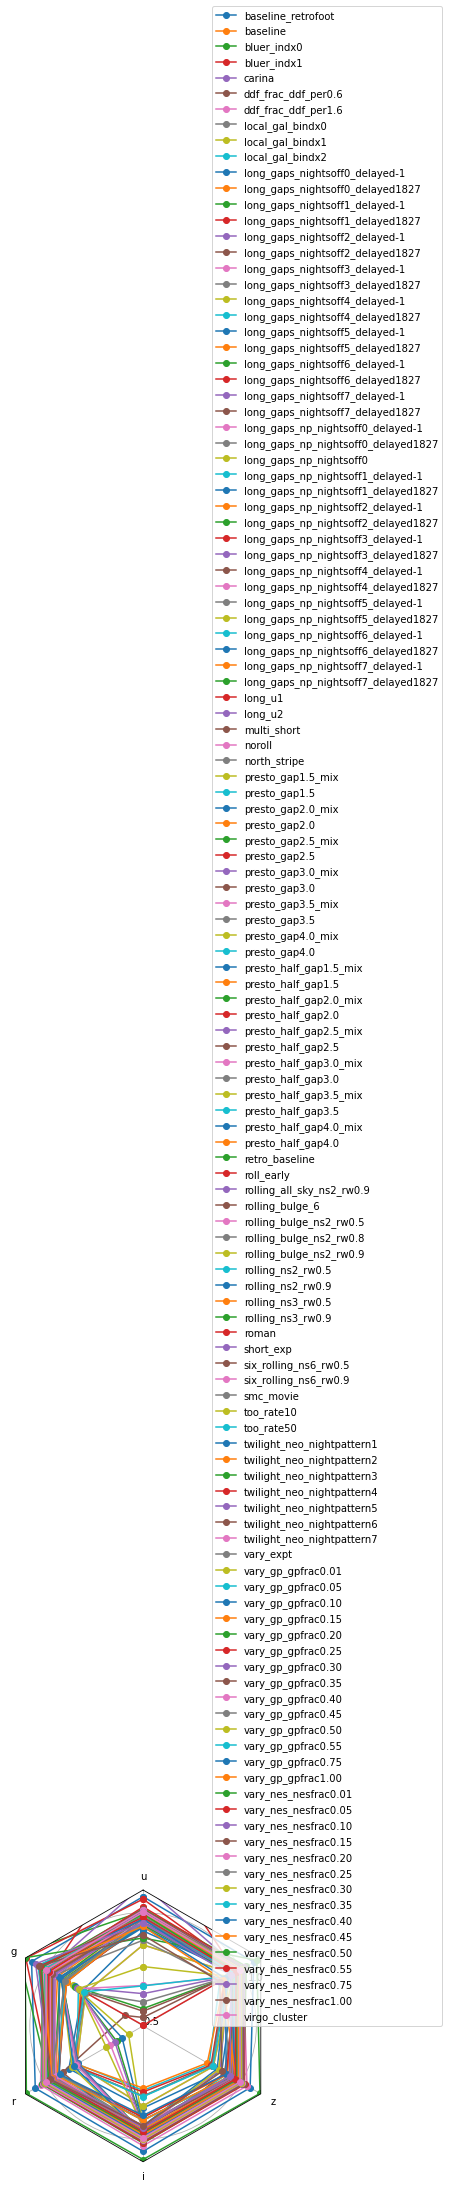

In [10]:
data_normed = norm_df(data, runs, mag_cols, norm_run='baseline',
                      invert_cols=None, mag_cols='all')
data_normed = data_normed.rename(columns=mag_name_mapper)

fig, ax = radar(data_normed, legend=True, rgrids=[.50, 1.0, 1.1], alpha=.1)
fig.tight_layout()

In [11]:
runs = ['baseline'] + [name for name in data['runName'].values if 'twi' in name] 

In [12]:
runs

['baseline',
 'twilight_neo_nightpattern1',
 'twilight_neo_nightpattern2',
 'twilight_neo_nightpattern3',
 'twilight_neo_nightpattern4',
 'twilight_neo_nightpattern5',
 'twilight_neo_nightpattern6',
 'twilight_neo_nightpattern7']

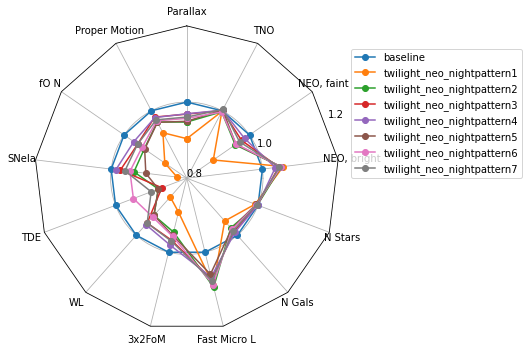

In [13]:
data_normed = norm_df(data, runs, cols, mag_cols=linear_cols,
                      invert_cols=['parallax_best18k', 'properMotion_best18k'],
                      norm_run='baseline')
data_normed = data_normed.rename(columns=name_mapper)
fig, ax = radar(data_normed, legend=True, rgrids=[0.8, 1.0, 1.2])
fig.tight_layout()

In [14]:
data_normed

,runName,Parallax,Proper Motion,fO N,SNeIa,TDE,WL,3x2FoM,Fast Micro L,N Gals,N Stars,"NEO, bright","NEO, faint",TNO
1,baseline,1.000000,1.000000,1.000000,1.000000,1.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
90,twilight_neo_nightpattern1,0.903910,0.934953,0.870083,0.825768,0.65,0.865591,0.891344,1.089259,0.949986,0.991934,1.055077,0.884447,0.998148
91,twilight_neo_nightpattern2,0.947572,0.966751,0.935638,0.939693,0.88,0.930108,0.945580,1.094535,0.974069,0.998244,1.049484,0.954545,0.996914
92,twilight_neo_nightpattern3,0.968424,0.981346,0.957092,0.975800,0.87,0.956989,0.967509,1.073433,0.986599,0.998010,1.043029,0.974808,1.000617
93,twilight_neo_nightpattern4,0.969286,0.980088,0.969011,0.987436,0.78,0.962366,0.981108,1.067314,0.989943,0.998991,1.034208,0.984118,1.001852
94,twilight_neo_nightpattern5,0.949522,0.965858,0.934446,0.908344,0.88,0.930108,0.954311,1.059506,0.977434,0.994116,1.049484,0.956736,1.002469
95,twilight_neo_nightpattern6,0.957158,0.970248,0.942789,0.950375,0.95,0.935484,0.956847,1.087571,0.979278,0.995545,1.048623,0.957831,0.996296
96,twilight_neo_nightpattern7,0.960702,0.973175,0.957092,0.963613,0.90,0.956989,0.969946,1.077654,0.983874,0.995799,1.044966,0.968237,1.004321


In [15]:
data.loc[1], data.loc[90]

(runName                  baseline
 version                       2.0
 parallax_best18k         0.791058
 properMotion_best18k     0.184088
 fO_fONv MedianNvis          839.0
                           ...    
 DD:EDFSa,y              26.468794
 DD:EDFSb,y              26.494803
 NEO bright                 0.9296
 NEO faint                  0.3652
 TNO                         0.648
 Name: 1, Length: 61, dtype: object,
 runName                 twilight_neo_nightpattern1
 version                                        2.0
 parallax_best18k                          0.875151
 properMotion_best18k                      0.196896
 fO_fONv MedianNvis                           730.0
                                    ...            
 DD:EDFSa,y                               26.676117
 DD:EDFSb,y                               26.683266
 NEO bright                                  0.9808
 NEO faint                                    0.323
 TNO                                         0.6468
 Name:

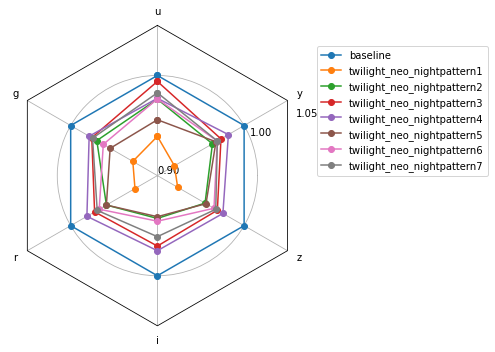

In [16]:
data_normed = norm_df(data, runs, mag_cols, norm_run='baseline',
                      invert_cols=None, mag_cols='all')
data_normed = data_normed.rename(columns=mag_name_mapper)

fig, ax = radar(data_normed, legend=True, rgrids=[.90, 1.0, 1.05], alpha=.1)
fig.tight_layout()

In [17]:
runs = ['baseline'] + [name for name in data['runName'].values if 'nes' in name] 

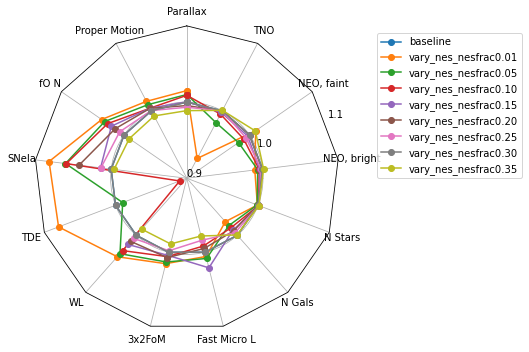

In [18]:
data_normed = norm_df(data, runs[0:9], cols, mag_cols=linear_cols,
                      invert_cols=['parallax_best18k', 'properMotion_best18k'],
                      norm_run='baseline')
data_normed = data_normed.rename(columns=name_mapper)
fig, ax = radar(data_normed, legend=True, rgrids=[0.9, 1.0, 1.1])
fig.tight_layout()

In [19]:
runs = ['baseline'] + [name for name in data['runName'].values if 'gp' in name] 

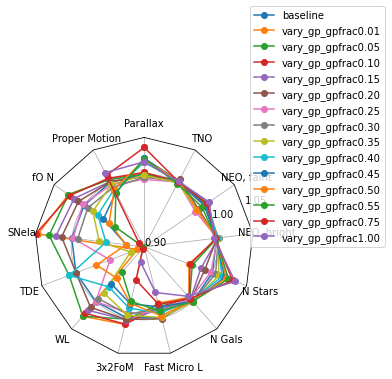

In [20]:
data_normed = norm_df(data, runs, cols, mag_cols=linear_cols,
                      invert_cols=['parallax_best18k', 'properMotion_best18k'],
                      norm_run='baseline')
data_normed = data_normed.rename(columns=name_mapper)
fig, ax = radar(data_normed, legend=True, rgrids=[0.9, 1.0, 1.05])
fig.tight_layout()

In [21]:
runs = ['baseline'] + [name for name in data['runName'].values if 'long_gaps_nightsoff0' in name] 

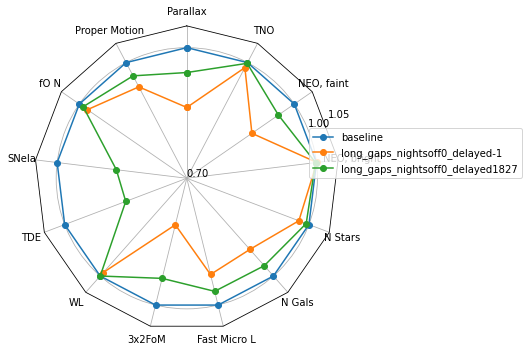

In [22]:
data_normed = norm_df(data, runs, cols, mag_cols=linear_cols,
                      invert_cols=['parallax_best18k', 'properMotion_best18k'],
                      norm_run='baseline')
data_normed = data_normed.rename(columns=name_mapper)
fig, ax = radar(data_normed, legend=True, rgrids=[0.7, 1.0, 1.05])
fig.tight_layout()

In [23]:
runs

['baseline',
 'long_gaps_nightsoff0_delayed-1',
 'long_gaps_nightsoff0_delayed1827']

In [24]:
runs = ['baseline'] + [name for name in data['runName'].values if 'presto_gap' in name] 

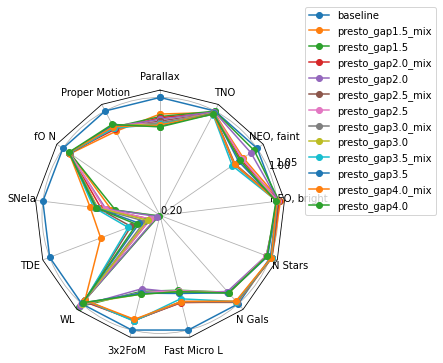

In [25]:
data_normed = norm_df(data, runs, cols, mag_cols=linear_cols,
                      invert_cols=['parallax_best18k', 'properMotion_best18k'],
                      norm_run='baseline')
data_normed = data_normed.rename(columns=name_mapper)
fig, ax = radar(data_normed, legend=True, rgrids=[0.2, 1.0, 1.05])
fig.tight_layout()

In [26]:
runs = ['baseline'] + [name for name in data['runName'].values if 'delayed-1' in name and 'np' not in name] 

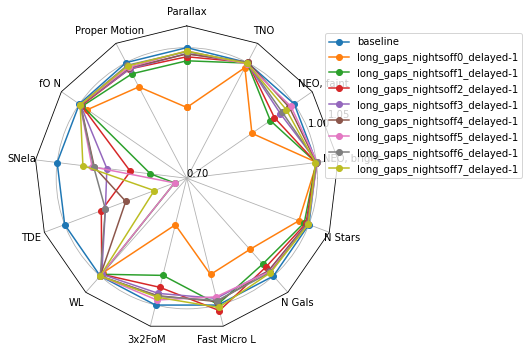

In [27]:
data_normed = norm_df(data, runs, cols, mag_cols=linear_cols,
                      invert_cols=['parallax_best18k', 'properMotion_best18k'],
                      norm_run='baseline')
data_normed = data_normed.rename(columns=name_mapper)
fig, ax = radar(data_normed, legend=True, rgrids=[0.7, 1.0, 1.05])
fig.tight_layout()

In [28]:
runs = ['baseline'] + [name for name in data['runName'].values if 'vary_gp' in name] 

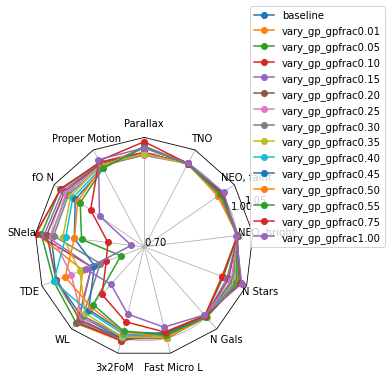

In [29]:
data_normed = norm_df(data, runs, cols, mag_cols=linear_cols,
                      invert_cols=['parallax_best18k', 'properMotion_best18k'],
                      norm_run='baseline')
data_normed = data_normed.rename(columns=name_mapper)
fig, ax = radar(data_normed, legend=True, rgrids=[0.7, 1.0, 1.05])
fig.tight_layout()

In [30]:
data_normed

,runName,Parallax,Proper Motion,fO N,SNeIa,TDE,WL,3x2FoM,Fast Micro L,N Gals,N Stars,"NEO, bright","NEO, faint",TNO
1,baseline,1.000000,1.000000,1.000000,1.000000,1.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
98,vary_gp_gpfrac0.01,1.001193,1.003973,1.026222,1.046542,0.91,1.026882,1.009425,0.979321,0.992380,0.965494,1.002151,1.004381,1.000926
99,vary_gp_gpfrac0.05,0.999783,1.004155,1.026222,1.031373,1.01,1.026882,1.001922,0.981642,0.993915,0.970386,1.000861,1.002738,1.001852
100,vary_gp_gpfrac0.10,1.002078,1.006120,1.023838,1.049764,0.88,1.021505,1.009038,0.984807,0.993482,0.967048,0.999355,1.001643,1.000617
101,vary_gp_gpfrac0.15,0.996344,1.000988,1.016687,1.022067,0.88,1.016129,1.002628,0.988394,0.995588,0.982994,1.002151,1.000548,1.000617
102,vary_gp_gpfrac0.20,0.996753,1.000616,1.009535,1.014004,1.00,1.010753,1.002398,1.001477,0.996826,0.988683,1.000430,0.990690,1.004321
103,vary_gp_gpfrac0.25,0.992487,0.996277,1.002384,0.998229,0.95,1.000000,0.993238,0.991348,0.995205,0.997733,1.001076,0.985214,1.000309
104,vary_gp_gpfrac0.30,0.995568,0.991788,0.994041,0.991915,0.85,0.994624,0.995149,0.986917,0.999916,1.004569,1.002582,1.000000,1.001852
105,vary_gp_gpfrac0.35,0.998133,0.996559,0.985697,0.962078,0.92,0.983871,0.996420,0.999578,1.000393,1.009554,1.001291,0.987952,0.999074
106,vary_gp_gpfrac0.40,1.015906,0.988835,0.977354,0.952763,1.01,0.973118,0.986451,0.993248,0.998021,1.014150,1.000645,1.006024,1.001235
